##Data Prepocessing and EDA


###Download Libraries


In [2]:
pip install pandas matplotlib scikit-learn google.colab numpy seaborn

### Import Packages

In [3]:
import pandas
import numpy
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

###Feature Selection

In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
drive.mount('/content/drive')

file_path='/content/drive/My Drive/NYC_property_sales.csv'
df=pandas.read_csv(file_path)
categorical_columns = df.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()


categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    label_encoder.fit(df[column])
    df[column] = label_encoder.transform(df[column])


correlation_matrix = df.corr()
sale_price_correlation = correlation_matrix['sale_price'].sort_values(ascending=False)

print("Correlation Matrix for First Half of the Data:")
print(sale_price_correlation)




Mounted at /content/drive
Correlation Matrix for First Half of the Data:
sale_price                        1.000000
gross_square_feet                 0.599353
total_units                       0.282097
residential_units                 0.247729
tax_class_at_time_of_sale         0.170025
commercial_units                  0.149667
tax_class_at_present              0.147846
building_class_category           0.142524
land_square_feet                  0.130064
building_class_at_present         0.064809
building_class_at_time_of_sale    0.064764
lot                               0.017583
sale_date                         0.011233
address                          -0.000745
neighborhood                     -0.002349
borough                          -0.015218
apartment_number                 -0.016970
year_built                       -0.034857
block                            -0.077050
zip_code                         -0.089630
Name: sale_price, dtype: float64


<Figure size 1000x600 with 0 Axes>

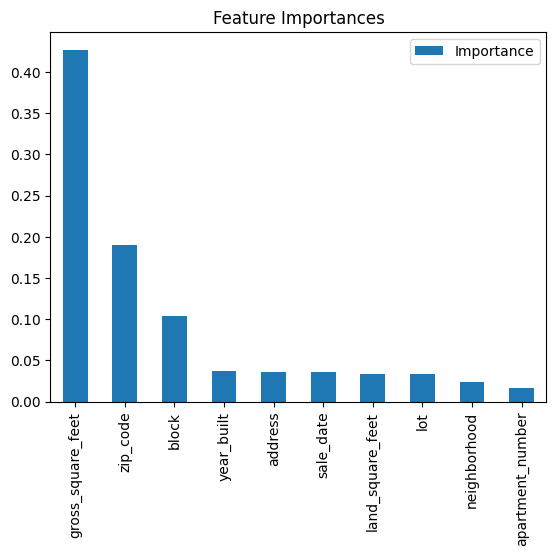

In [5]:

df['log_sale_price'] = numpy.log(df['sale_price'])
X = df.drop(['sale_price', 'log_sale_price'], axis=1)
y = df['log_sale_price']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = X_train.dropna()
y_train = y_train[X_train.index]



model = RandomForestRegressor(n_estimators=100, random_state=42)


model.fit(X_train, y_train)


importances = model.feature_importances_
feature_names = X.columns


feat_importances = pd.DataFrame(importances, index=feature_names, columns=["Importance"]).sort_values("Importance", ascending=False)


plt.figure(figsize=(10, 6))
feat_importances[:10].plot(kind='bar')
plt.title('Feature Importances')
plt.show()


In [6]:
corr_rankings = pd.DataFrame(sale_price_correlation)
corr_rankings.columns = ['Correlation']
corr_rankings['Corr_Rank'] = corr_rankings['Correlation'].abs().rank(ascending=False)


combined_features = feat_importances.merge(corr_rankings, left_index=True, right_index=True)
combined_features['Average_Rank'] = (combined_features['Importance'].rank(ascending=False) + combined_features['Corr_Rank']) / 2
combined_features = combined_features.sort_values(by='Average_Rank')


print(combined_features)


top_features = combined_features.head(10)
print("Top Selected Features Based on Combined Insights:")
print(top_features)



                                Importance  Correlation  Corr_Rank  \
gross_square_feet                 0.427216     0.599353        2.0   
zip_code                          0.190176    -0.089630       10.0   
block                             0.103592    -0.077050       11.0   
land_square_feet                  0.033920     0.130064        9.0   
residential_units                 0.010426     0.247729        4.0   
year_built                        0.036813    -0.034857       14.0   
total_units                       0.005841     0.282097        3.0   
building_class_category           0.013212     0.142524        8.0   
commercial_units                  0.004410     0.149667        6.0   
lot                               0.033266     0.017583       15.0   
tax_class_at_time_of_sale         0.001196     0.170025        5.0   
sale_date                         0.035450     0.011233       18.0   
building_class_at_present         0.008768     0.064809       12.0   
address             

###Data Preprocessing


In [7]:
drive.mount('/content/drive')

file_path='/content/drive/My Drive/NYC_property_sales.csv'
data=pandas.read_csv(file_path)
selected_features = ['gross_square_feet', 'total_units', 'block', 'commercial_units',
                     'zip_code', 'year_built', 'land_square_feet', 'lot', 'building_class_category', 'residential_units', 'sale_price']
data_selected = data[selected_features]

data_selected = data_selected.dropna(subset=['zip_code', 'year_built'])





data_selected.to_csv('/content/drive/My Drive/modified_NYC_property_sales.csv', index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###EDA

count    3.814400e+04
mean     2.426295e+06
std      1.863379e+07
min      1.004000e+04
25%      5.250000e+05
50%      7.600000e+05
75%      1.280000e+06
max      2.155000e+09
Name: sale_price, dtype: float64


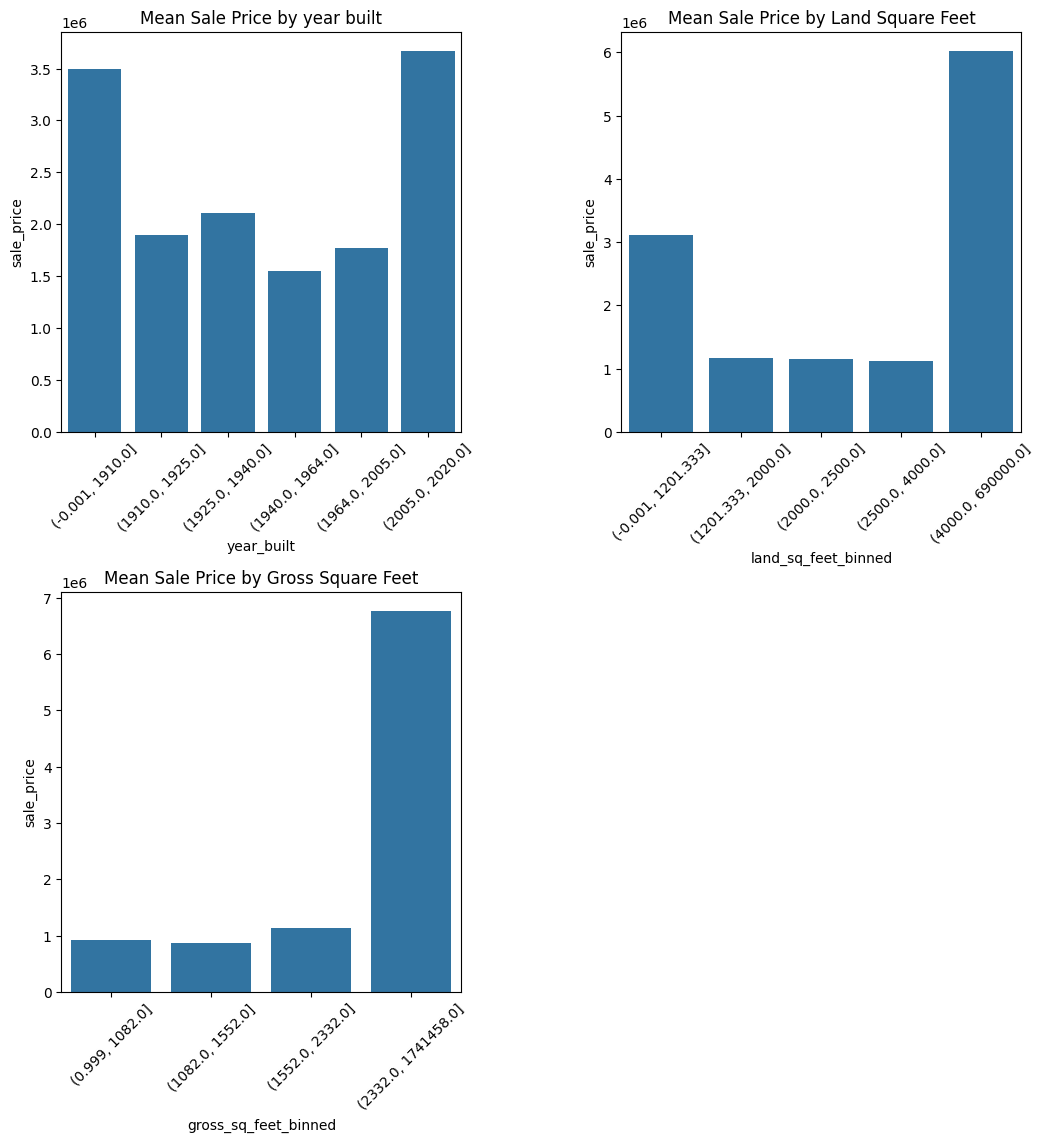

In [8]:
print(data_selected['sale_price'].describe())
data_selected['year_built'] = pandas.qcut(data_selected['year_built'], q=6, duplicates='drop')
mean_year_built = data_selected.groupby('year_built')['sale_price'].mean().reset_index()
data_selected['land_sq_feet_binned'] = pandas.qcut(data_selected['land_square_feet'], q=6, duplicates='drop')
mean_price_land = data_selected.groupby('land_sq_feet_binned')['sale_price'].mean().reset_index()
data_selected['gross_sq_feet_binned'] = pandas.qcut(data_selected['gross_square_feet'], q=4, duplicates='drop')
mean_price_gross = data_selected.groupby('gross_sq_feet_binned')['sale_price'].mean().reset_index()

plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
seaborn.barplot(x='year_built', y='sale_price', data=mean_year_built)
plt.title('Mean Sale Price by year built')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
seaborn.barplot(x='land_sq_feet_binned', y='sale_price', data=mean_price_land)
plt.title('Mean Sale Price by Land Square Feet')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
seaborn.barplot(x='gross_sq_feet_binned', y='sale_price', data=mean_price_gross)
plt.title('Mean Sale Price by Gross Square Feet')
plt.xticks(rotation=45)


plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.4, wspace=0.4)
plt.show()
